In [14]:
!pip install -Uqq fastai duckduckgo_search


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.21.6 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-serving-api 2.9.0 requires tensorflo

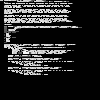

In [15]:
import PIL
#from fastai import open_image

def char_to_pixel(c):
    if c == ' ':
        return 1
    return ord(c) * 2 - 1

def text_to_image(text, img_file):
    width = 100
    lines_processed = 0
    raw = []
    for line in text.splitlines():
        padded_line = line[:width].ljust(width, ' ')
        pixels = [char_to_pixel(c) for c in padded_line]
        raw.extend(pixels)
        lines_processed += 1
    blank_line = [1] * width
    while lines_processed < width:
        raw.extend(blank_line)
        lines_processed += 1
    # padded_text
    # return raw
    im = PIL.Image.frombytes('L', (width, width), bytes(raw))
    im.save(img_file, 'png')
    

# test
import inspect
import difflib
source = inspect.getsource(difflib.context_diff)
#source = inspect.getsource(inspect.getsource)
text_to_image(source, 'python.png')

from IPython.display import Image as show_image
from fastai.vision.all import *
Image.open('python.png').to_thumb(400, 400)